## Full hg19 Repeat Masker

In [99]:
import pandas as pd
import numpy as np

In [2]:
#sample built with bash command (after conda install coreutils)
#shuf hg38.fa.out | head -n 1000 > sample_hg38.fa.out

In [25]:
repeat_df = pd.read_csv("../download/RepeatMasker/hg19.fa.out", sep=r"\s+",skiprows=2,header=None, index_col=False)

In [26]:
repeat_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,463,1.3,0.6,1.7,chr1,10001,10468,(249240153),+,(TAACCC)n,Simple_repeat,1,463,(0),1.0
1,3612,11.4,21.5,1.3,chr1,10469,11447,(249239174),C,TAR1,Satellite/telo,(399),1712,483,2.0
2,484,25.1,13.2,0.0,chr1,11505,11675,(249238946),C,L1MC5a,LINE/L1,(2382),5648,5452,3.0
3,239,29.4,1.9,1.0,chr1,11678,11780,(249238841),C,MER5B,DNA/hAT-Charlie,(74),104,1,4.0
4,318,23.0,3.7,0.0,chr1,15265,15355,(249235266),C,MIR3,SINE/MIR,(119),143,49,5.0
5,18,23.2,0.0,2.0,chr1,15798,15849,(249234772),+,(TGCTCC)n,Simple_repeat,1,51,(0),6.0
6,18,13.7,0.0,0.0,chr1,16713,16744,(249233877),+,(TGG)n,Simple_repeat,1,32,(0),7.0
7,239,33.8,12.9,0.0,chr1,18907,19048,(249231573),+,L2a,LINE/L2,2942,3104,(322),8.0
8,994,31.2,6.0,2.5,chr1,19972,20405,(249230216),+,L3,LINE/CR1,2680,3129,(970),9.0
9,270,33.1,0.7,2.7,chr1,20531,20679,(249229942),+,Plat_L3,LINE/CR1,2802,2947,(639),10.0


In [27]:
repeat_df.columns = ['SW_score', 'perc_div', 'perc_del', 'perc_ins', 'query_sequence', 
                     'pos_in_query_begin', 'pos_in_query_end', 'pos_in_query_left', 'match_with_seq', 
                     'matching_repeat', 'repeat_class_family', 
                     'pos_in_repeat_begin', 'pos_in_repeat_end', 'pos_in_repeat_left', 'ID']

In [115]:
nan_IDs = repeat_df.isnull().query("ID == True").index.values
#1364311
#1495373

In [123]:
nan_IDs.size

2

In [117]:
max(repeat_df.ID)

4562664.0

In [118]:


for el in nan_IDs:
    new_id = max(repeat_df.ID) + 1
    repeat_df.set_value(el, 'ID', new_id)
    print(el)

1364311
1495373


In [121]:
repeat_df['ID'] = repeat_df.ID.astype(int).astype(str)

In [124]:
repeat_df.head()

,SW_score,perc_div,perc_del,perc_ins,query_sequence,pos_in_query_begin,pos_in_query_end,pos_in_query_left,match_with_seq,matching_repeat,repeat_class_family,pos_in_repeat_begin,pos_in_repeat_end,pos_in_repeat_left,ID
0,463,1.3,0.6,1.7,chr1,10001,10468,(249240153),+,(TAACCC)n,Simple_repeat,1,463,(0),1
1,3612,11.4,21.5,1.3,chr1,10469,11447,(249239174),C,TAR1,Satellite/telo,(399),1712,483,2
2,484,25.1,13.2,0.0,chr1,11505,11675,(249238946),C,L1MC5a,LINE/L1,(2382),5648,5452,3
3,239,29.4,1.9,1.0,chr1,11678,11780,(249238841),C,MER5B,DNA/hAT-Charlie,(74),104,1,4
4,318,23.0,3.7,0.0,chr1,15265,15355,(249235266),C,MIR3,SINE/MIR,(119),143,49,5


In [125]:
repeat_df['query_sequence'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
       'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
       'chr22', 'chr21', 'chr6_ssto_hap7', 'chr6_mcf_hap5',
       'chr6_cox_hap2', 'chr6_mann_hap4', 'chr6_apd_hap1', 'chr6_qbl_hap6',
       'chr6_dbb_hap3', 'chr17_ctg5_hap1', 'chr4_ctg9_hap1',
       'chr1_gl000192_random', 'chr4_gl000194_random', 'chrUn_gl000225',
       'chr4_gl000193_random', 'chr9_gl000200_random', 'chrUn_gl000212',
       'chrUn_gl000222', 'chr7_gl000195_random', 'chrUn_gl000223',
       'chrUn_gl000219', 'chrUn_gl000224', 'chr17_gl000205_random',
       'chrUn_gl000215', 'chrUn_gl000216', 'chrUn_gl000217',
       'chr9_gl000199_random', 'chrUn_gl000211', 'chrUn_gl000213',
       'chrUn_gl000218', 'chrUn_gl000220', 'chr19_gl000209_random',
       'chrUn_gl000214', 'chrUn_gl000221', 'chr19_gl000208_random',
       'chr1_gl000191_random', 'chrUn_gl000227', '

In [126]:
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
       'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
       'chr22', 'chr21']
repeat_filtered_df = repeat_df.query("query_sequence in @chrom_list")

In [127]:
repeat_filtered_df[['query_sequence', 'ID']].groupby(
    ['query_sequence']).agg(['count'])

,ID
,count
query_sequence,
chr1,450101
chr10,245260
chr11,249829
chr12,258926
chr13,164806
chr14,165690
chr15,159267
chr16,175256


In [128]:
repeat_filtered_df[['query_sequence', 'matching_repeat', 'repeat_class_family', 'ID']].groupby(
    ['repeat_class_family']).agg(['count'])

,query_sequence,matching_repeat,ID
,count,count,count
repeat_class_family,,,
DNA,6481,6481,6481
DNA/Kolobok,232,232,232
DNA/MULE-MuDR,1936,1936,1936
DNA/Merlin,57,57,57
DNA/PIF-Harbinger,30,30,30
DNA/PiggyBac,2109,2109,2109
DNA/TcMar,1812,1812,1812
DNA/TcMar-Mariner,16308,16308,16308


In [200]:
repeat_filtered_df.head()

,SW_score,perc_div,perc_del,perc_ins,query_sequence,pos_in_query_begin,pos_in_query_end,pos_in_query_left,match_with_seq,matching_repeat,repeat_class_family,pos_in_repeat_begin,pos_in_repeat_end,pos_in_repeat_left,ID
0,463,1.3,0.6,1.7,chr1,10001,10468,(249240153),+,(TAACCC)n,Simple_repeat,1,463,(0),1
1,3612,11.4,21.5,1.3,chr1,10469,11447,(249239174),C,TAR1,Satellite/telo,(399),1712,483,2
2,484,25.1,13.2,0.0,chr1,11505,11675,(249238946),C,L1MC5a,LINE/L1,(2382),5648,5452,3
3,239,29.4,1.9,1.0,chr1,11678,11780,(249238841),C,MER5B,DNA/hAT-Charlie,(74),104,1,4
4,318,23.0,3.7,0.0,chr1,15265,15355,(249235266),C,MIR3,SINE/MIR,(119),143,49,5


In [147]:
repeat_classes = repeat_filtered_df.repeat_class_family.unique()

In [148]:
repeat_classes

array(['Simple_repeat', 'Satellite/telo', 'LINE/L1', 'DNA/hAT-Charlie',
       'SINE/MIR', 'LINE/L2', 'LINE/CR1', 'LTR/ERVL-MaLR', 'SINE/Alu',
       'DNA/hAT', 'LTR/ERVL', 'LTR', 'LTR/ERV1', 'DNA/hAT-Tip100',
       'Low_complexity', 'DNA/TcMar-Tigger', 'LTR/ERVL?', 'LTR/ERV1?',
       'LINE/RTE-X', 'LTR?', 'LTR/ERVK', 'snRNA', 'Retroposon/SVA',
       'DNA/MULE-MuDR', 'tRNA', 'DNA?', 'LTR/Gypsy', 'DNA/hAT-Blackjack',
       'Unknown', 'Satellite', 'DNA/hAT-Tag1', 'srpRNA', 'DNA/hAT-Ac',
       'rRNA', 'DNA/TcMar-Tc2', 'SINE/tRNA-Deu', 'LINE/RTE-BovB', 'scRNA',
       'SINE/5S-Deu-L2', 'DNA/PiggyBac', 'DNA/hAT?', 'DNA',
       'DNA/TcMar-Mariner', 'RC/Helitron', 'LTR/Gypsy?', 'DNA/hAT-Tip100?',
       'SINE/tRNA-RTE', 'SINE/tRNA', 'LINE/Jockey', 'LINE/Penelope',
       'LINE/Dong-R4', 'DNA/TcMar-Tc1', 'RNA', 'DNA/Kolobok', 'DNA/TcMar',
       'Satellite/centr', 'RC?/Helitron?', 'DNA?/hAT-Tip100?',
       'DNA/Merlin', 'DNA?/PiggyBac?', 'DNA/TcMar-Pogo', 'LINE/L1-Tx1',
       'DNA/TcMa

## SINE/Alu Analysis

In [201]:
sine_alu_df = pd.DataFrame()

In [210]:
sine_alu_df = repeat_filtered_df.query("repeat_class_family == 'SINE/Alu'")
sine_alu_df.reset_index(inplace=True, drop=True)

In [211]:
len(sine_alu_df)

1177252

In [212]:
import pybedtools
from pybedtools import BedTool
a = pybedtools.example_bedtool('a.bed')

In [213]:
a

<BedTool(/Users/manuel/anaconda/lib/python3.5/site-packages/pybedtools/test/data/a.bed)>

In [214]:
a.to_dataframe().columns

Index(['chrom', 'start', 'end', 'name', 'score', 'strand'], dtype='object')

In [215]:
sine_alu_df.match_with_seq.unique()

array(['+', 'C'], dtype=object)

In [216]:
#ID is not the ID of the interval match
len(sine_alu_df.ID.unique()) == len(sine_alu_df)

False

In [217]:
sine_alu_df.head()

,SW_score,perc_div,perc_del,perc_ins,query_sequence,pos_in_query_begin,pos_in_query_end,pos_in_query_left,match_with_seq,matching_repeat,repeat_class_family,pos_in_repeat_begin,pos_in_repeat_end,pos_in_repeat_left,ID
0,2070,9.5,0.4,0.0,chr1,26791,27053,(249223568),+,AluSp,SINE/Alu,1,264,(49),18
1,2059,14.1,0.3,0.3,chr1,31436,31733,(249218888),+,AluJo,SINE/Alu,1,298,(14),28
2,233,25.0,0.0,0.0,chr1,33466,33509,(249217112),+,Alu,SINE/Alu,1,44,(89),31
3,1000,13.5,0.0,0.0,chr1,35367,35499,(249215122),+,AluJr,SINE/Alu,1,133,(179),37
4,2292,12.0,0.0,0.0,chr1,39624,39924,(249210697),+,AluSx,SINE/Alu,1,301,(11),42


In [218]:
bed_df = pd.DataFrame(columns=['chrom', 'start', 'end', 'name', 'score', 'strand'])

In [229]:
bed_df.chrom = sine_alu_df.query_sequence
bed_df.start = sine_alu_df.pos_in_query_begin
bed_df.end = sine_alu_df.pos_in_query_end
bed_df.name = "RepeatMasker" + "." + pd.Series(sine_alu_df.index.values.astype(str)) + "." + sine_alu_df.matching_repeat +"." + sine_alu_df.ID
bed_df.score = sine_alu_df.SW_score
bed_df.strand = "."

In [230]:
bed_df.head()

,chrom,start,end,name,score,strand
0,chr1,26791,27053,RepeatMasker.0.AluSp.18,2070,.
1,chr1,31436,31733,RepeatMasker.1.AluJo.28,2059,.
2,chr1,33466,33509,RepeatMasker.2.Alu.31,233,.
3,chr1,35367,35499,RepeatMasker.3.AluJr.37,1000,.
4,chr1,39624,39924,RepeatMasker.4.AluSx.42,2292,.


In [232]:
bed = BedTool.from_dataframe(bed_df)

In [252]:
store = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [253]:
store.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [250]:
len(store.keys()) == 66*2

True

In [254]:
store.close()

## Some overlaps

In [300]:
store = pd.HDFStore("../storage/encode_staging.hdf")
store.keys()
#store.close()

['/CL_0000047_hg19_DNase_H3K27ac_bed',
 '/CL_0000084_hg19_DNase_H3K27ac_bed',
 '/CL_0000127_hg19_DNase_H3K27ac_bed',
 '/CL_0000236_hg19_DNase_H3K27ac_bed',
 '/CL_0000312_hg19_DNase_H3K27ac_bed',
 '/CL_0000351_hg19_DNase_H3K27ac_bed',
 '/CL_0000515_hg19_DNase_H3K27ac_bed',
 '/CL_0000623_hg19_DNase_H3K27ac_bed',
 '/CL_0001054_hg19_DNase_H3K27ac_bed',
 '/CL_0001059_hg19_DNase_H3K27ac_bed',
 '/CL_0002327_hg19_DNase_H3K27ac_bed',
 '/CL_0002372_hg19_DNase_H3K27ac_bed',
 '/CL_0002551_hg19_DNase_H3K27ac_bed',
 '/CL_0002553_hg19_DNase_H3K27ac_bed',
 '/CL_0002618_hg19_DNase_H3K27ac_bed',
 '/CL_1001608_hg19_DNase_H3K27ac_bed',
 '/CL_2000045_hg19_DNase_H3K27ac_bed',
 '/EFO_0000586_hg19_DNase_H3K27ac_bed',
 '/EFO_0001187_hg19_DNase_H3K27ac_bed',
 '/EFO_0001203_hg19_DNase_H3K27ac_bed',
 '/EFO_0002067_hg19_DNase_H3K27ac_bed',
 '/EFO_0002713_hg19_DNase_H3K27ac_bed',
 '/EFO_0002784_hg19_DNase_H3K27ac_bed',
 '/EFO_0002791_hg19_DNase_H3K27ac_bed',
 '/EFO_0002824_hg19_DNase_H3K27ac_bed',
 '/EFO_0003042_hg

In [605]:
encode_metadata = pd.read_hdf("../storage/encode_staging.hdf", "encode_metadata")

In [606]:
encode_metadata.query("assembly == 'hg19' & method=='DNase_H3K27ac' & biosample_term_name == 'neuronal stem cell'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
29,ENCSR755KBI,hg19,CL:0000047,neuronal stem cell,stem cell,Enhancer-like regions using DNase and H3K27ac ...,[ectoderm],3,"June, 2016",[],/organisms/human/,[central nervous system],ENCFF564UIF.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac


In [311]:
encode_bed_df = pd.read_hdf("../storage/encode_staging.hdf", "CL_0000047_hg19_DNase_H3K27ac_bed")

In [548]:
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_Alu_bed")

In [549]:
fantom_bed_df = pd.read_hdf("../storage/fantom_staging.hdf", "permissive_bed")

In [550]:
from pybedtools import BedTool

In [551]:
fantom_bed = BedTool().from_dataframe(fantom_bed_df)
repeat_bed = BedTool().from_dataframe(repeat_bed_df)
encode_bed = BedTool().from_dataframe(encode_bed_df)

In [552]:
repeat_bed.count()

1177252

In [553]:
repeat_shuffled_bed = repeat_bed.shuffle(genome='hg19', chrom=False)

In [554]:
reldist_df = pd.DataFrame(fantom_bed.reldist(repeat_bed))

In [555]:
reldist_shuffled_df = pd.DataFrame(fantom_bed.reldist(repeat_shuffled_bed))

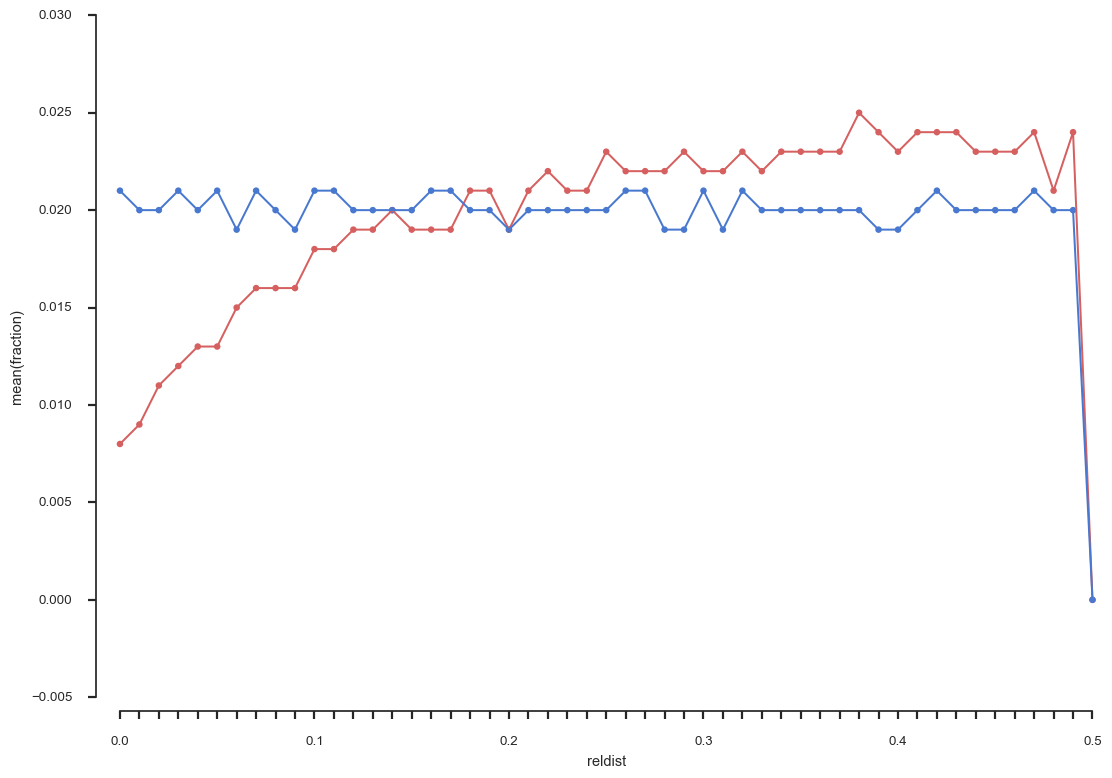

In [556]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=reldist_df,  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=reldist_shuffled_df, color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

In [557]:
reldist_encode_df = pd.DataFrame(encode_bed.reldist(repeat_bed))

In [558]:
reldist_encode_shuffled_df = pd.DataFrame(encode_bed.reldist(repeat_shuffled_bed))

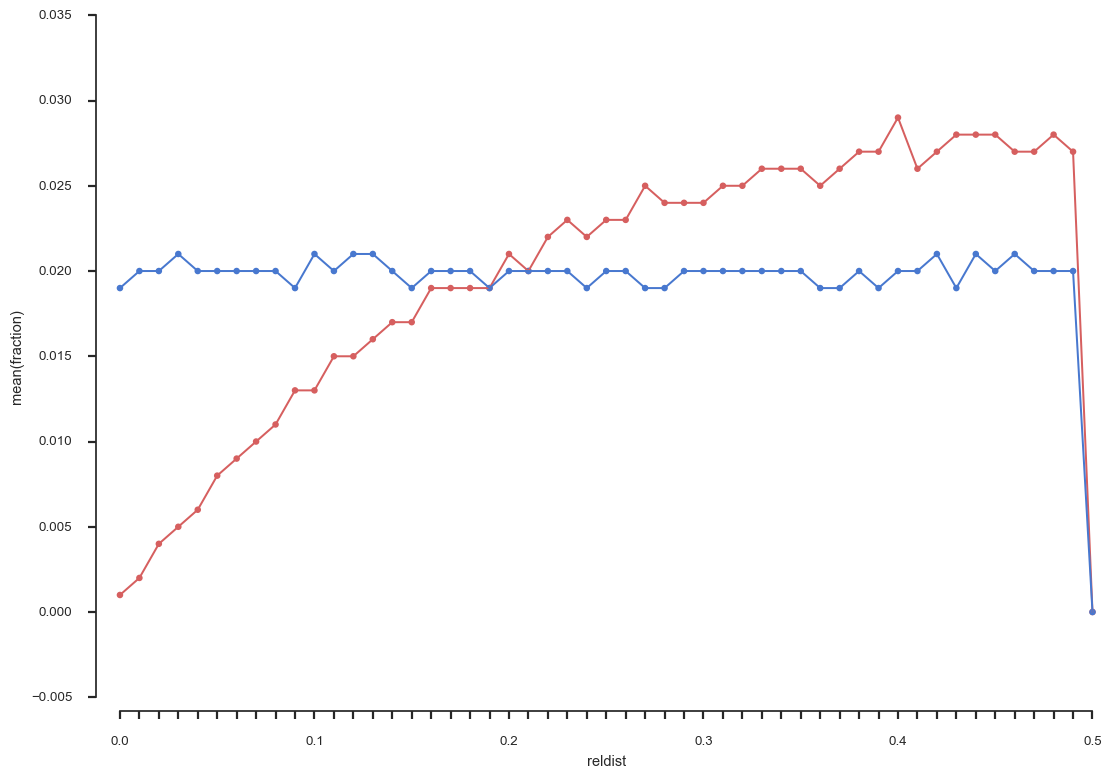

In [559]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=reldist_encode_df,  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=reldist_encode_shuffled_df, color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        

In [560]:
min_overlap = 0.3

In [561]:
repeat_bed.intersect(repeat_shuffled_bed, f=min_overlap).count() / repeat_bed.count()

0.1339934015826688

In [562]:
encode_bed.intersect(repeat_bed, f=min_overlap).count() / encode_bed.count()

0.008695840742507698

In [563]:
encode_bed.intersect(repeat_shuffled_bed, f=min_overlap).count() / encode_bed.count()

0.10677885240924664

In [564]:
fantom_bed.intersect(repeat_bed, f=min_overlap).count() / fantom_bed.count()

0.04377949826788496

In [565]:
fantom_bed.intersect(repeat_shuffled_bed, f=min_overlap).count() / fantom_bed.count()

0.13543047127479016

In [566]:
encode_bed.intersect(fantom_bed, f=min_overlap).count() / encode_bed.count()

0.04402133842217114

In [567]:
encode_bed.intersect(fantom_shuffled_bed, f=min_overlap).count() / encode_bed.count()

0.0047707854447673155

## Closeness 

In [568]:
fantom_sorted_bed = fantom_bed.sort()
encode_sorted_bed = encode_bed.sort()
repeat_sorted_bed = repeat_bed.sort()
fantom_sorted_shuffled_bed = fantom_shuffled_bed.sort()
repeat_sorted_shuffled_bed = repeat_shuffled_bed.sort()

In [569]:
encode_fantom_closeness = encode_sorted_bed.closest(fantom_sorted_bed, D='a')
encode_fantom_random_closeness = encode_sorted_bed.closest(fantom_sorted_shuffled_bed, D='a')

In [570]:
print(encode_fantom_closeness.head())
print(encode_fantom_random_closeness.head())

chr1	714040	714190	ENCODE.3.ENCFF564UIF.24656	1	.	chr1	858256	858648	FANTOM.5.PERMISSIVE.0	5	.	144067
 chr1	762860	763010	ENCODE.3.ENCFF564UIF.35885	1	.	chr1	858256	858648	FANTOM.5.PERMISSIVE.0	5	.	95247
 chr1	856560	856710	ENCODE.3.ENCFF564UIF.36899	1	.	chr1	858256	858648	FANTOM.5.PERMISSIVE.0	5	.	1547
 chr1	877080	877230	ENCODE.3.ENCFF564UIF.32863	1	.	chr1	858256	858648	FANTOM.5.PERMISSIVE.0	5	.	-18433
 chr1	877620	877770	ENCODE.3.ENCFF564UIF.44116	1	.	chr1	858256	858648	FANTOM.5.PERMISSIVE.0	5	.	-18973
 chr1	894660	894810	ENCODE.3.ENCFF564UIF.40903	1	.	chr1	918449	918555	FANTOM.5.PERMISSIVE.1	18	.	23640
 chr1	895840	895990	ENCODE.3.ENCFF564UIF.43928	1	.	chr1	918449	918555	FANTOM.5.PERMISSIVE.1	18	.	22460
 chr1	911600	911750	ENCODE.3.ENCFF564UIF.41951	1	.	chr1	918449	918555	FANTOM.5.PERMISSIVE.1	18	.	6700
 chr1	932320	932470	ENCODE.3.ENCFF564UIF.45801	1	.	chr1	941791	942135	FANTOM.5.PERMISSIVE.2	2	.	9322
 chr1	932493	933177	ENCODE.3.ENCFF564UIF.43140	1	.	chr1	941791	942135	FANTOM.5.P

In [571]:
encode_fantom_closeness_df = encode_fantom_closeness.to_dataframe()
encode_fantom_random_closeness_df = encode_fantom_random_closeness.to_dataframe()

/Users/manuel/anaconda/lib/python3.5/site-packages/pybedtools/bedtool.py:3199: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


In [572]:
closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand', 
                                      'close_chrom', 'close_start','close_end', 'close_name', 'close_score', 'close_strand',
                                      'distance']

encode_fantom_closeness_df.columns = closeness_columns
encode_fantom_random_closeness_df.columns = closeness_columns

In [573]:
encode_fantom_closeness_df.head()

,chrom,start,end,name,score,strand,close_chrom,close_start,close_end,close_name,close_score,close_strand,distance
0,chr1,714040,714190,ENCODE.3.ENCFF564UIF.24656,1,.,chr1,858256,858648,FANTOM.5.PERMISSIVE.0,5,.,144067
1,chr1,762860,763010,ENCODE.3.ENCFF564UIF.35885,1,.,chr1,858256,858648,FANTOM.5.PERMISSIVE.0,5,.,95247
2,chr1,856560,856710,ENCODE.3.ENCFF564UIF.36899,1,.,chr1,858256,858648,FANTOM.5.PERMISSIVE.0,5,.,1547
3,chr1,877080,877230,ENCODE.3.ENCFF564UIF.32863,1,.,chr1,858256,858648,FANTOM.5.PERMISSIVE.0,5,.,-18433
4,chr1,877620,877770,ENCODE.3.ENCFF564UIF.44116,1,.,chr1,858256,858648,FANTOM.5.PERMISSIVE.0,5,.,-18973


In [574]:
encode_fantom_random_closeness_df.head()

,chrom,start,end,name,score,strand,close_chrom,close_start,close_end,close_name,close_score,close_strand,distance
0,chr1,714040,714190,ENCODE.3.ENCFF564UIF.24656,1,.,chr1,620422,620741,FANTOM.5.PERMISSIVE.35807,129,.,-93300
1,chr1,762860,763010,ENCODE.3.ENCFF564UIF.35885,1,.,chr1,819387,819767,FANTOM.5.PERMISSIVE.9769,22,.,56378
2,chr1,856560,856710,ENCODE.3.ENCFF564UIF.36899,1,.,chr1,855634,856198,FANTOM.5.PERMISSIVE.28114,194,.,-363
3,chr1,877080,877230,ENCODE.3.ENCFF564UIF.32863,1,.,chr1,878773,878929,FANTOM.5.PERMISSIVE.15531,15,.,1544
4,chr1,877620,877770,ENCODE.3.ENCFF564UIF.44116,1,.,chr1,878773,878929,FANTOM.5.PERMISSIVE.15531,15,.,1004


In [575]:
len(encode_fantom_closeness_df.query("distance == 0"))

3591

In [576]:
encode_bed.intersect(fantom_bed).count()

3591

In [577]:
def compute_centers(closeness_df):
    closeness_df['centered_locus'] = round(
        (closeness_df['end'] - closeness_df['start'])/2 
        + closeness_df['start']).astype(int)

    closeness_df['close_centered_locus'] = round(
        (closeness_df['close_end'] - closeness_df['close_start'])/2 
        + closeness_df['close_start']).astype(int)

    closeness_df['centered_distance'] = closeness_df['close_centered_locus'] - closeness_df['centered_locus'] 
    return closeness_df


In [578]:
#compute centers of both ranges lists
encode_fantom_closeness_df = compute_centers(encode_fantom_closeness_df)
encode_fantom_random_closeness_df = compute_centers(encode_fantom_random_closeness_df)

In [579]:
encode_fantom_closeness_df.head()

,chrom,start,end,name,score,strand,close_chrom,close_start,close_end,close_name,close_score,close_strand,distance,centered_locus,close_centered_locus,centered_distance
0,chr1,714040,714190,ENCODE.3.ENCFF564UIF.24656,1,.,chr1,858256,858648,FANTOM.5.PERMISSIVE.0,5,.,144067,714115,858452,144337
1,chr1,762860,763010,ENCODE.3.ENCFF564UIF.35885,1,.,chr1,858256,858648,FANTOM.5.PERMISSIVE.0,5,.,95247,762935,858452,95517
2,chr1,856560,856710,ENCODE.3.ENCFF564UIF.36899,1,.,chr1,858256,858648,FANTOM.5.PERMISSIVE.0,5,.,1547,856635,858452,1817
3,chr1,877080,877230,ENCODE.3.ENCFF564UIF.32863,1,.,chr1,858256,858648,FANTOM.5.PERMISSIVE.0,5,.,-18433,877155,858452,-18703
4,chr1,877620,877770,ENCODE.3.ENCFF564UIF.44116,1,.,chr1,858256,858648,FANTOM.5.PERMISSIVE.0,5,.,-18973,877695,858452,-19243


In [580]:
858256 - 714190

144066

In [581]:
858648 - 877080

-18432

In [582]:
encode_fantom_closeness_df[['centered_distance']].describe()

,centered_distance
count,4.638600e+04
mean,2.663937e+02
std,7.578156e+04
min,-1.381064e+06
25%,-1.620700e+04
50%,6.000000e+00
75%,1.605150e+04
max,1.370528e+06


In [583]:
encode_fantom_random_closeness_df[['centered_distance']].describe()

,centered_distance
count,46118.000000
mean,79.040071
std,51107.444916
min,-450830.000000
25%,-25091.000000
50%,142.000000
75%,25399.250000
max,309377.000000


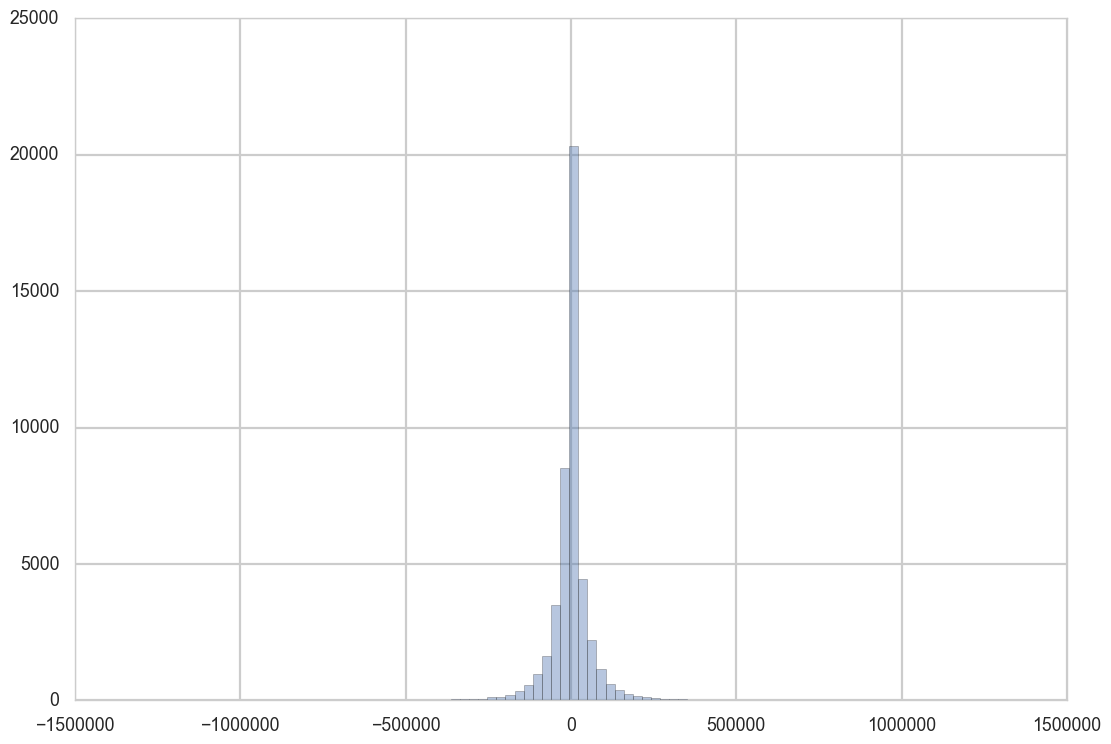

In [584]:
# simple plot of distances from start/end of intervals
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.distplot(encode_fantom_closeness_df[['centered_distance']], kde=False, bins=100)


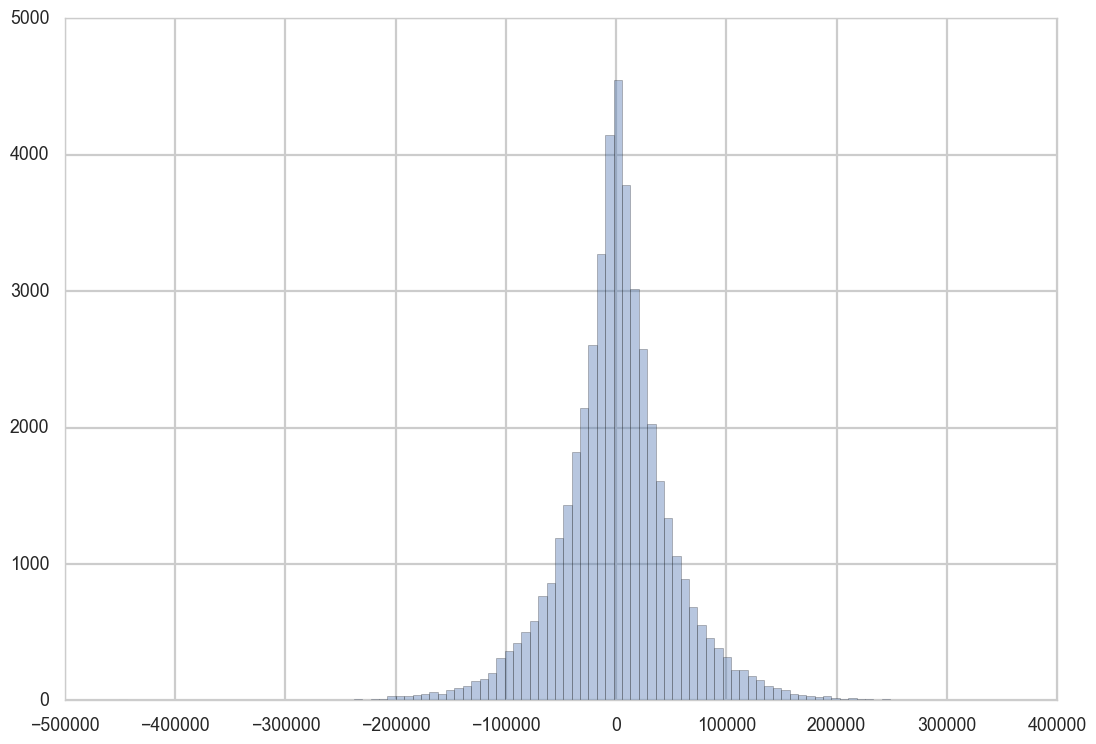

In [585]:
g = sns.distplot(encode_fantom_random_closeness_df[['centered_distance']], kde=False,bins=100)


In [607]:
def compute_centers(closeness_df):
    closeness_df['centered_locus'] = round(
        (closeness_df['end'] - closeness_df['start'])/2 
        + closeness_df['start']).astype(int)

    closeness_df['close_centered_locus'] = round(
        (closeness_df['close_end'] - closeness_df['close_start'])/2 
        + closeness_df['close_start']).astype(int)

    closeness_df['centered_distance'] = closeness_df['close_centered_locus'] - closeness_df['centered_locus'] 
    return closeness_df

def build_closeness_analysis(bed, bed_with, assembly, conserve_chrom):
    
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                         'close_chrom', 'close_start','close_end', 
                         'close_name', 'close_score', 'close_strand', 'distance']
    
    shuffled_bed = bed.shuffle(genome=assembly, chrom=conserve_chrom).sort()
    shuffled_bed_with = bed_with.shuffle(genome=assembly, chrom=conserve_chrom).sort()
    
    sorted_bed = bed.sort()
    sorted_bed_with = bed_with.sort()
    
    # real on real
    closeness = sorted_bed.closest(sorted_bed_with, D='a')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    
    # genomic background1: real on shuffled
    shuffled_closeness = bed.closest(shuffled_bed_with, D='a')
    shuffled_closeness_df = shuffled_closeness.to_dataframe()
    shuffled_closeness_df.columns = closeness_columns
    shuffled_closeness_df = compute_centers(shuffled_closeness_df)
    
    #genomic background2: shuffled on shuffled
    totally_shuffled_closeness = shuffled_bed.closest(shuffled_bed_with, D='a')
    totally_shuffled_closeness_df = totally_shuffled_closeness.to_dataframe()
    totally_shuffled_closeness_df.columns = closeness_columns
    totally_shuffled_closeness_df = compute_centers(totally_shuffled_closeness_df)
    

In [586]:
encode_repeat_closeness = encode_sorted_bed.closest(repeat_sorted_bed, D='a')
encode_repeat_closeness_df = encode_repeat_closeness.to_dataframe()
encode_repeat_closeness_df.columns = closeness_columns
encode_repeat_closeness_df = compute_centers(encode_repeat_closeness_df)

/Users/manuel/anaconda/lib/python3.5/site-packages/pybedtools/bedtool.py:3199: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


(-10000, 10000)

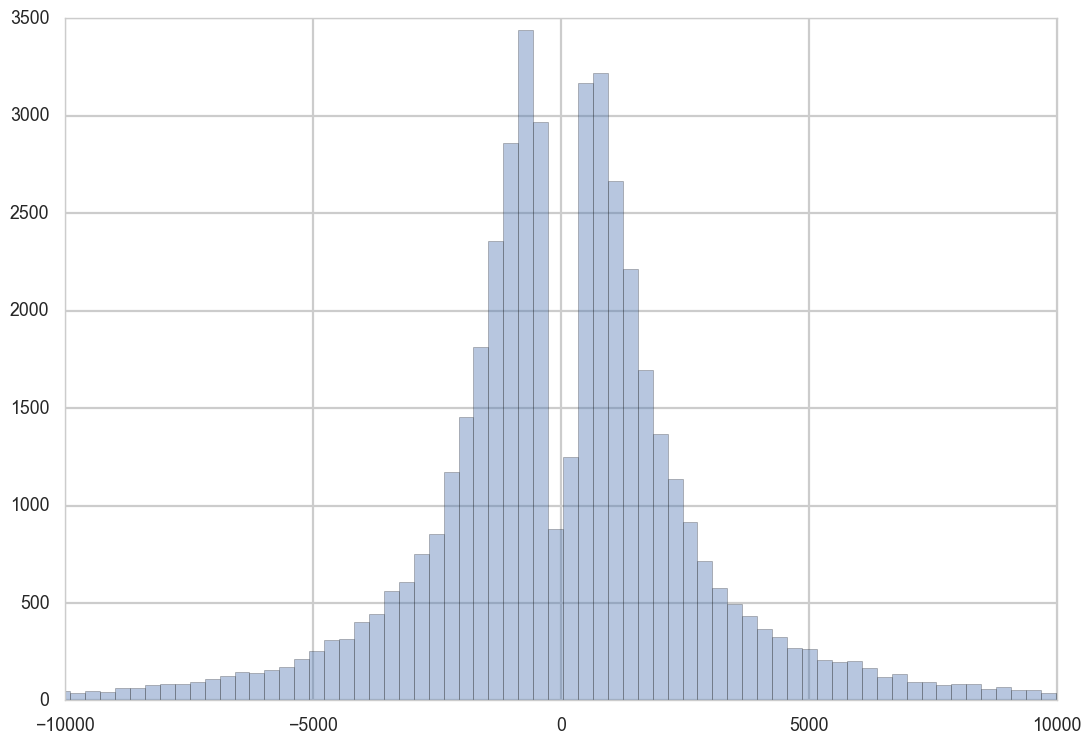

In [617]:
# simple plot of distances from start/end of intervals
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.distplot(encode_repeat_closeness_df[['centered_distance']], kde=False, bins=1000)
g.set_xlim(-10000, 10000)

In [746]:
encode_repeat_shuffled_closeness = encode_sorted_bed.closest(repeat_sorted_shuffled_bed, D='a')
encode_repeat_shuffled_closeness_df = encode_repeat_shuffled_closeness.to_dataframe()
encode_repeat_shuffled_closeness_df.columns = closeness_columns
encode_repeat_shuffled_closeness_df = compute_centers(encode_repeat_shuffled_closeness_df)

/Users/manuel/anaconda/lib/python3.5/site-packages/pybedtools/bedtool.py:3199: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


(-10000, 10000)

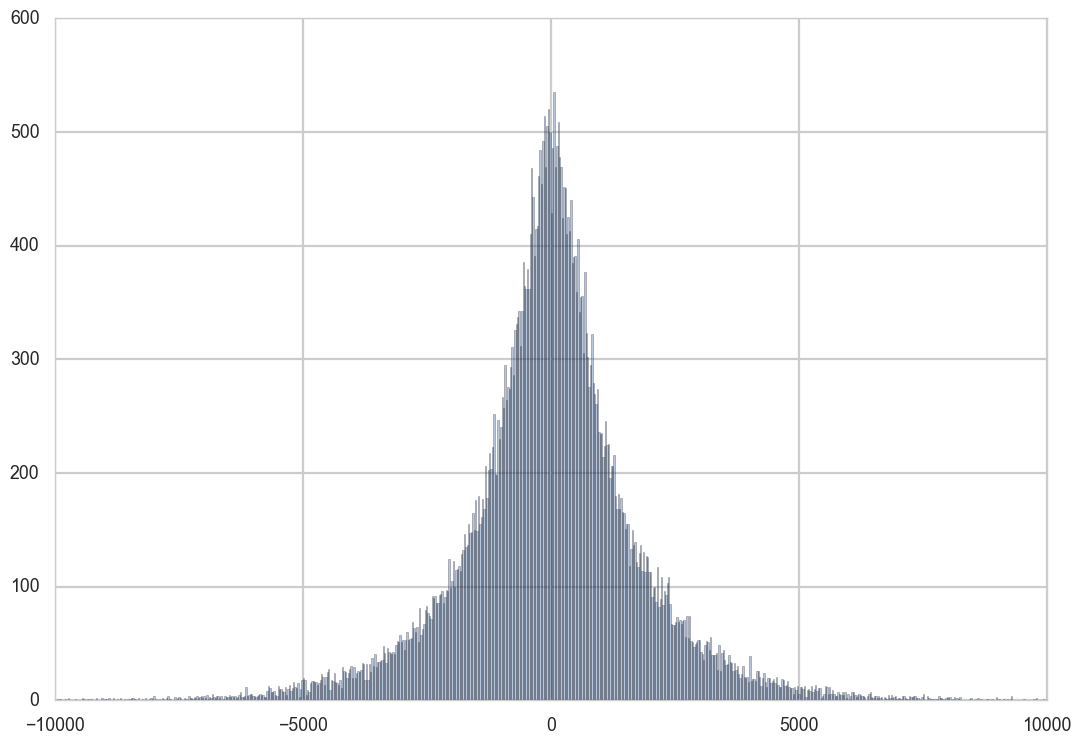

In [747]:
# simple plot of distances from start/end of intervals
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g = sns.distplot(encode_repeat_shuffled_closeness_df[['centered_distance']], kde=False, bins=1000)
g.set_xlim(-10000, 10000)

(-10000, 10000)

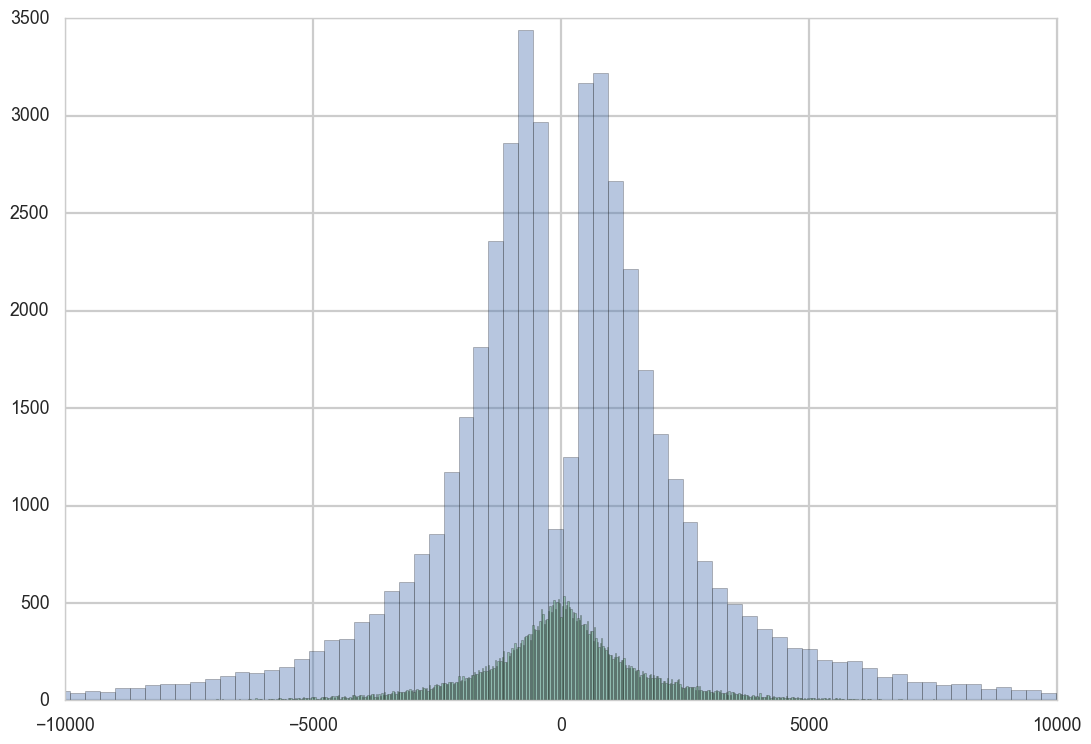

In [748]:
# simple plot of distances from start/end of intervals
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(encode_repeat_closeness_df[['centered_distance']], kde=False, bins=1000)
g2 = sns.distplot(encode_repeat_shuffled_closeness_df[['centered_distance']], kde=False, bins=1000)

g2.set_xlim(-10000, 10000)

In [749]:
encode_sorted_shuffled_bed = encode_bed.shuffle(genome='hg19').sort()

In [750]:
encode_shuffled_repeat_closeness = encode_sorted_shuffled_bed.closest(repeat_sorted_shuffled_bed, D='a')
encode_shuffled_repeat_closeness_df = encode_shuffled_repeat_closeness.to_dataframe()
encode_shuffled_repeat_closeness_df.columns = closeness_columns
encode_shuffled_repeat_closeness_df = compute_centers(encode_shuffled_repeat_closeness_df)

/Users/manuel/anaconda/lib/python3.5/site-packages/pybedtools/bedtool.py:3199: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


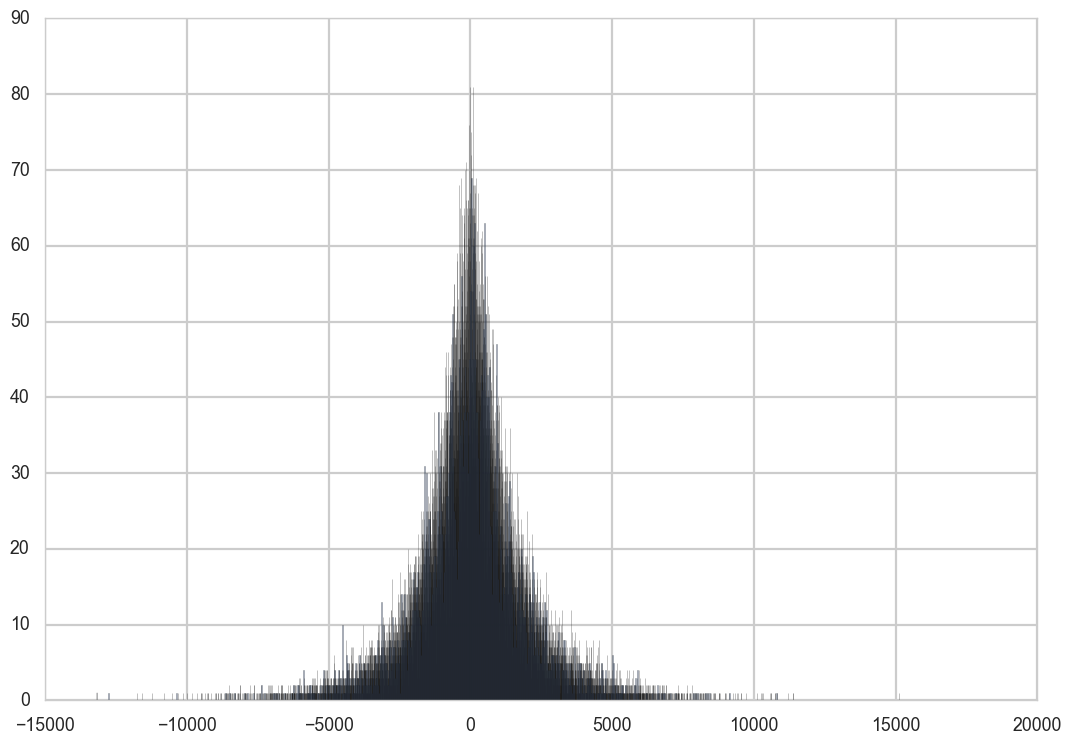

In [751]:
g3 = sns.distplot(encode_shuffled_repeat_closeness_df[['centered_distance']], kde=False, bins=10000)


(-10000, 10000)

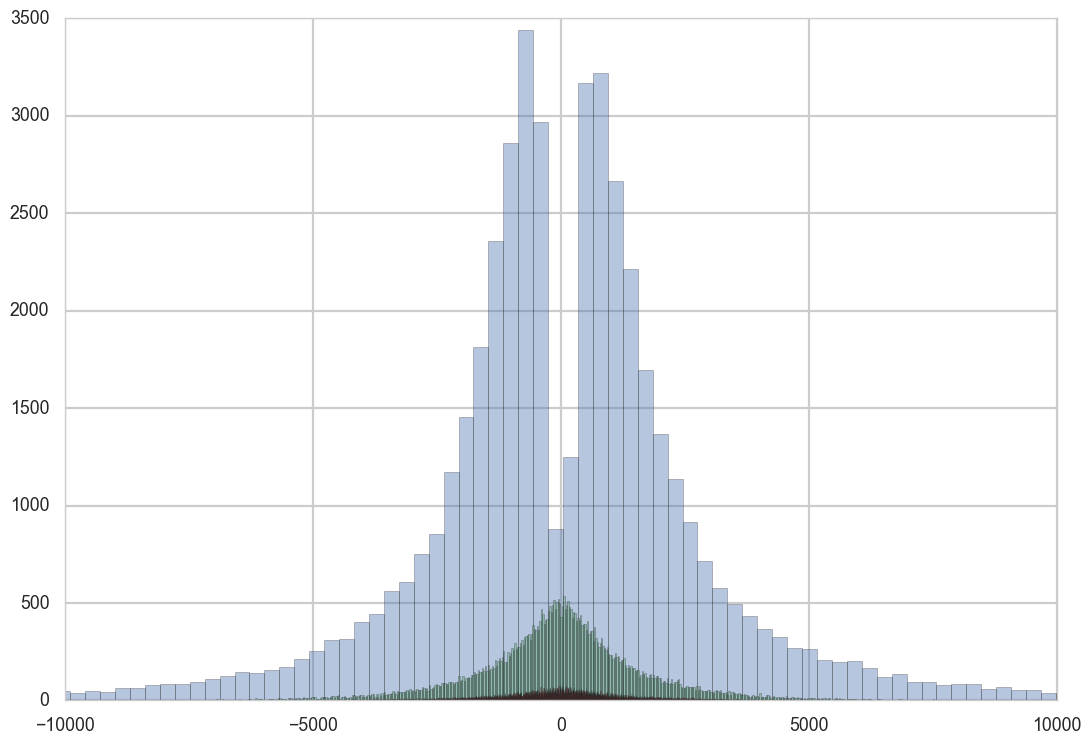

In [753]:
# simple plot of distances from start/end of intervals
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")
%matplotlib inline
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(encode_repeat_closeness_df[['centered_distance']], kde=False, bins=1000)
g2 = sns.distplot(encode_repeat_shuffled_closeness_df[['centered_distance']], kde=False, bins=1000)
g3 = sns.distplot(encode_shuffled_repeat_closeness_df[['centered_distance']], kde=False, bins=10000)

g3.set_xlim(-10000, 10000)

In [754]:
abs(encode_repeat_closeness_df[['centered_distance']]).describe()

,centered_distance
count,47165.000000
mean,2358.723397
std,4761.340330
min,0.000000
25%,755.000000
50%,1402.000000
75%,2700.000000
max,252974.000000


In [755]:
abs(encode_repeat_shuffled_closeness_df[['centered_distance']]).describe()

,centered_distance
count,48934.000000
mean,1285.973250
std,1312.561244
min,0.000000
25%,371.000000
50%,869.500000
75%,1767.000000
max,14121.000000


In [756]:
abs(encode_repeat_closeness_df[['centered_distance']]).quantile(0.95)

centered_distance    7376.6
Name: 0.95, dtype: float64

In [757]:
abs(encode_repeat_shuffled_closeness_df[['centered_distance']]).quantile(0.95)

centered_distance    3919.0
Name: 0.95, dtype: float64

In [758]:
abs(encode_shuffled_repeat_closeness_df[['centered_distance']]).quantile(0.95)

centered_distance    3973.7
Name: 0.95, dtype: float64

In [759]:
density_hist = np.histogram(encode_repeat_closeness_df['centered_distance'], bins=1000)

In [760]:
density_df = pd.DataFrame(density_hist[0])
density_df.columns = ['density']
density_df['bin_edges'] = density_hist[1][1:].astype(float)
density_df['abs_bin_edges'] = abs(density_df['bin_edges'])

In [761]:
density_df.head()

,density,bin_edges,abs_bin_edges
0,1,-47835.889,47835.889
1,0,-47534.778,47534.778
2,0,-47233.667,47233.667
3,0,-46932.556,46932.556
4,0,-46631.445,46631.445


In [807]:
density = sum(density_df.query("bin_edges >= -50 & bin_edges <= 50")['density'])

In [808]:
density_rnd_hist = np.histogram(encode_repeat_shuffled_closeness_df['centered_distance'], bins=1000)

In [809]:
density_rnd_hist_df = pd.DataFrame(density_rnd_hist[0])
density_rnd_hist_df.columns = ['density']
density_rnd_hist_df['bin_edges'] = density_rnd_hist[1][1:].astype(float)
density_rnd_hist_df['abs_bin_edges'] = abs(density_rnd_hist_df['bin_edges'])

In [810]:
density_rnd = sum(density_rnd_hist_df.query("bin_edges >= -50 & bin_edges <= 50")['density'])

In [811]:
rough_enrichment = density - density_rnd

In [812]:
rough_enrichment

-1055

In [813]:
density

880

In [814]:
density_rnd

1935